In [52]:
import matplotlib.pyplot as plt
import re

# 获取所有类名
all_class_names = [
    'background', 'building', 'fence', 'person', 'pole', 
    'road', 'sidewalk', 'vegetation', 'car', 'wall', 'traffic sign'
]

def parse_log_file(file_path):
    results = {}
    results['mIoU'] = {}
    for class_name in all_class_names:
        results[class_name] = {}

    with open(file_path, 'r') as file:
        lines = file.readlines()

    for i, line in enumerate(lines):
        # 提取 epoch 和 mean_IoU
        epoch_match = re.search(r'Current epoch:(\d+)\s+mIoU:\s+([\d.]+)', line)
        if epoch_match:
            epoch = int(epoch_match.group(1))
            mean_iou = float(epoch_match.group(2))
            results['mIoU'][epoch] = mean_iou

        # 提取每一类的结果
        class_match = re.match(r'(\d+)\s+([\w\s]+)\s+([\d.]+)\s+([\d.]+)', line)
        if class_match:
            class_id = int(class_match.group(1))
            class_name = class_match.group(2).strip()  # 去除多余的空格
            iou = float(class_match.group(3))
            acc = float(class_match.group(4))
            epoch_line_index = i + (12 - class_id)

            if epoch_line_index < len(lines):
                epoch_line = lines[epoch_line_index]
                epoch_match = re.search(r'== Epoch:\s+(\d+)\s+mean_IoU\s+([\d.]+)', epoch_line)
                if epoch_match:
                    epoch = int(epoch_match.group(1))
                    results[class_name][epoch] = {'iou': iou, 'acc': acc}

    return results

# Define the file path
results_dicts = {}
file_paths = [
    '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_all_11_20240926_183606_train.log',
    '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20240926_183740_train.log',
    '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_night_11_20240926_202405_train.log',
    '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_ie/rgbe_all_11_20240926_215143_train.log',
    '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_ie/rgbe_day_11_20240926_222732_train.log',
    '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_ie/rgbe_night_11_20240927_042047_train.log',
]
for file_path in file_paths:
    parts = file_path.split('/')
    filename = parts[-1]
    scene = filename.split('_')[:2]
    scene = '_'.join(scene)

    # Initialize an empty dictionary to store the results
    results_dict = parse_log_file(file_path)
    results_dicts[scene] = results_dict

6
dict_keys(['mIoU', 'background', 'building', 'fence', 'person', 'pole', 'road', 'sidewalk', 'vegetation', 'car', 'wall', 'traffic sign'])
{50: {'iou': 53.22, 'acc': 59.14}, 53: {'iou': 52.92, 'acc': 58.59}, 64: {'iou': 53.37, 'acc': 57.78}, 73: {'iou': 56.72, 'acc': 64.81}, 83: {'iou': 56.84, 'acc': 64.51}, 95: {'iou': 56.93, 'acc': 62.41}, 101: {'iou': 58.0, 'acc': 63.2}, 103: {'iou': 55.97, 'acc': 59.74}, 106: {'iou': 54.92, 'acc': 58.42}, 148: {'iou': 60.36, 'acc': 66.01}, 160: {'iou': 59.31, 'acc': 64.22}, 161: {'iou': 60.3, 'acc': 66.36}, 174: {'iou': 61.36, 'acc': 67.22}, 208: {'iou': 60.92, 'acc': 66.55}}
{50: {'iou': 41.06, 'acc': 48.26}, 53: {'iou': 42.45, 'acc': 50.73}, 64: {'iou': 39.36, 'acc': 44.92}, 73: {'iou': 36.48, 'acc': 41.03}, 83: {'iou': 38.75, 'acc': 43.3}, 95: {'iou': 39.12, 'acc': 44.0}, 101: {'iou': 38.45, 'acc': 46.62}, 103: {'iou': 39.98, 'acc': 47.02}, 106: {'iou': 41.11, 'acc': 45.51}, 148: {'iou': 42.88, 'acc': 49.29}, 160: {'iou': 37.29, 'acc': 41.03}, 

In [53]:
len(results_dicts['rgbe_day']['wall']), results_dicts['rgbe_day']['wall'].values()

(24,
 dict_values([{'iou': 46.27, 'acc': 64.73}, {'iou': 44.76, 'acc': 60.39}, {'iou': 44.68, 'acc': 64.4}, {'iou': 42.75, 'acc': 58.89}, {'iou': 44.59, 'acc': 65.76}, {'iou': 40.48, 'acc': 64.48}, {'iou': 45.51, 'acc': 64.75}, {'iou': 44.26, 'acc': 66.17}, {'iou': 41.49, 'acc': 58.51}, {'iou': 43.5, 'acc': 63.8}, {'iou': 41.94, 'acc': 63.28}, {'iou': 44.55, 'acc': 67.69}, {'iou': 42.23, 'acc': 60.73}, {'iou': 44.39, 'acc': 66.24}, {'iou': 43.23, 'acc': 62.25}, {'iou': 44.89, 'acc': 64.62}, {'iou': 44.18, 'acc': 61.6}, {'iou': 43.59, 'acc': 62.18}, {'iou': 47.2, 'acc': 63.6}, {'iou': 46.4, 'acc': 63.41}, {'iou': 43.53, 'acc': 62.0}, {'iou': 44.19, 'acc': 62.17}, {'iou': 44.53, 'acc': 60.95}, {'iou': 44.67, 'acc': 60.38}]))

scene:  rgb_all max mIoU:  73.44 max epoch:  196
scene:  rgb_day max mIoU:  73.55 max epoch:  356
scene:  rgb_night max mIoU:  69.56 max epoch:  356
scene:  rgbe_all max mIoU:  73.29 max epoch:  204
scene:  rgbe_day max mIoU:  73.32 max epoch:  360
scene:  rgbe_night max mIoU:  69.3 max epoch:  209


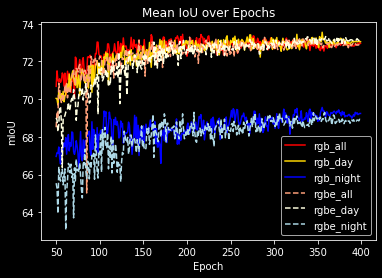

In [57]:
# 定义线型和颜色
line_styles = {
    'rgb_day': ('-', '#FFD700'),  # 深黄色
    'rgb_night': ('-', '#0000FF'),  # 深蓝色
    'rgbe_day': ('--', '#FFFFE0'),  # 浅黄色
    'rgbe_night': ('--', '#ADD8E6'),  # 浅蓝色
    'rgb_all': ('-', '#FF0000'),  # 红色
    'rgbe_all': ('--', '#FFA07A')  # 浅红色
}

# 可视化 mean_IoU
fig, ax = plt.subplots()
for scene, results_dict in results_dicts.items():
    # 从 epoch 50 开始提取数据
    filtered_results = {epoch: miou for epoch, miou in results_dict['mIoU'].items() if epoch >= 50}
    epochs = list(filtered_results.keys())
    mIoUs = list(filtered_results.values())
    print("scene: ", scene, "max mIoU: ", max(mIoUs), "max epoch: ", epochs[mIoUs.index(max(mIoUs))+1])
    line_style, color = line_styles.get(scene, ('-', 'black'))
    ax.plot(epochs, mIoUs, label=scene, linestyle=line_style, color=color)
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('mIoU')
plt.title('Mean IoU over Epochs')
plt.show()

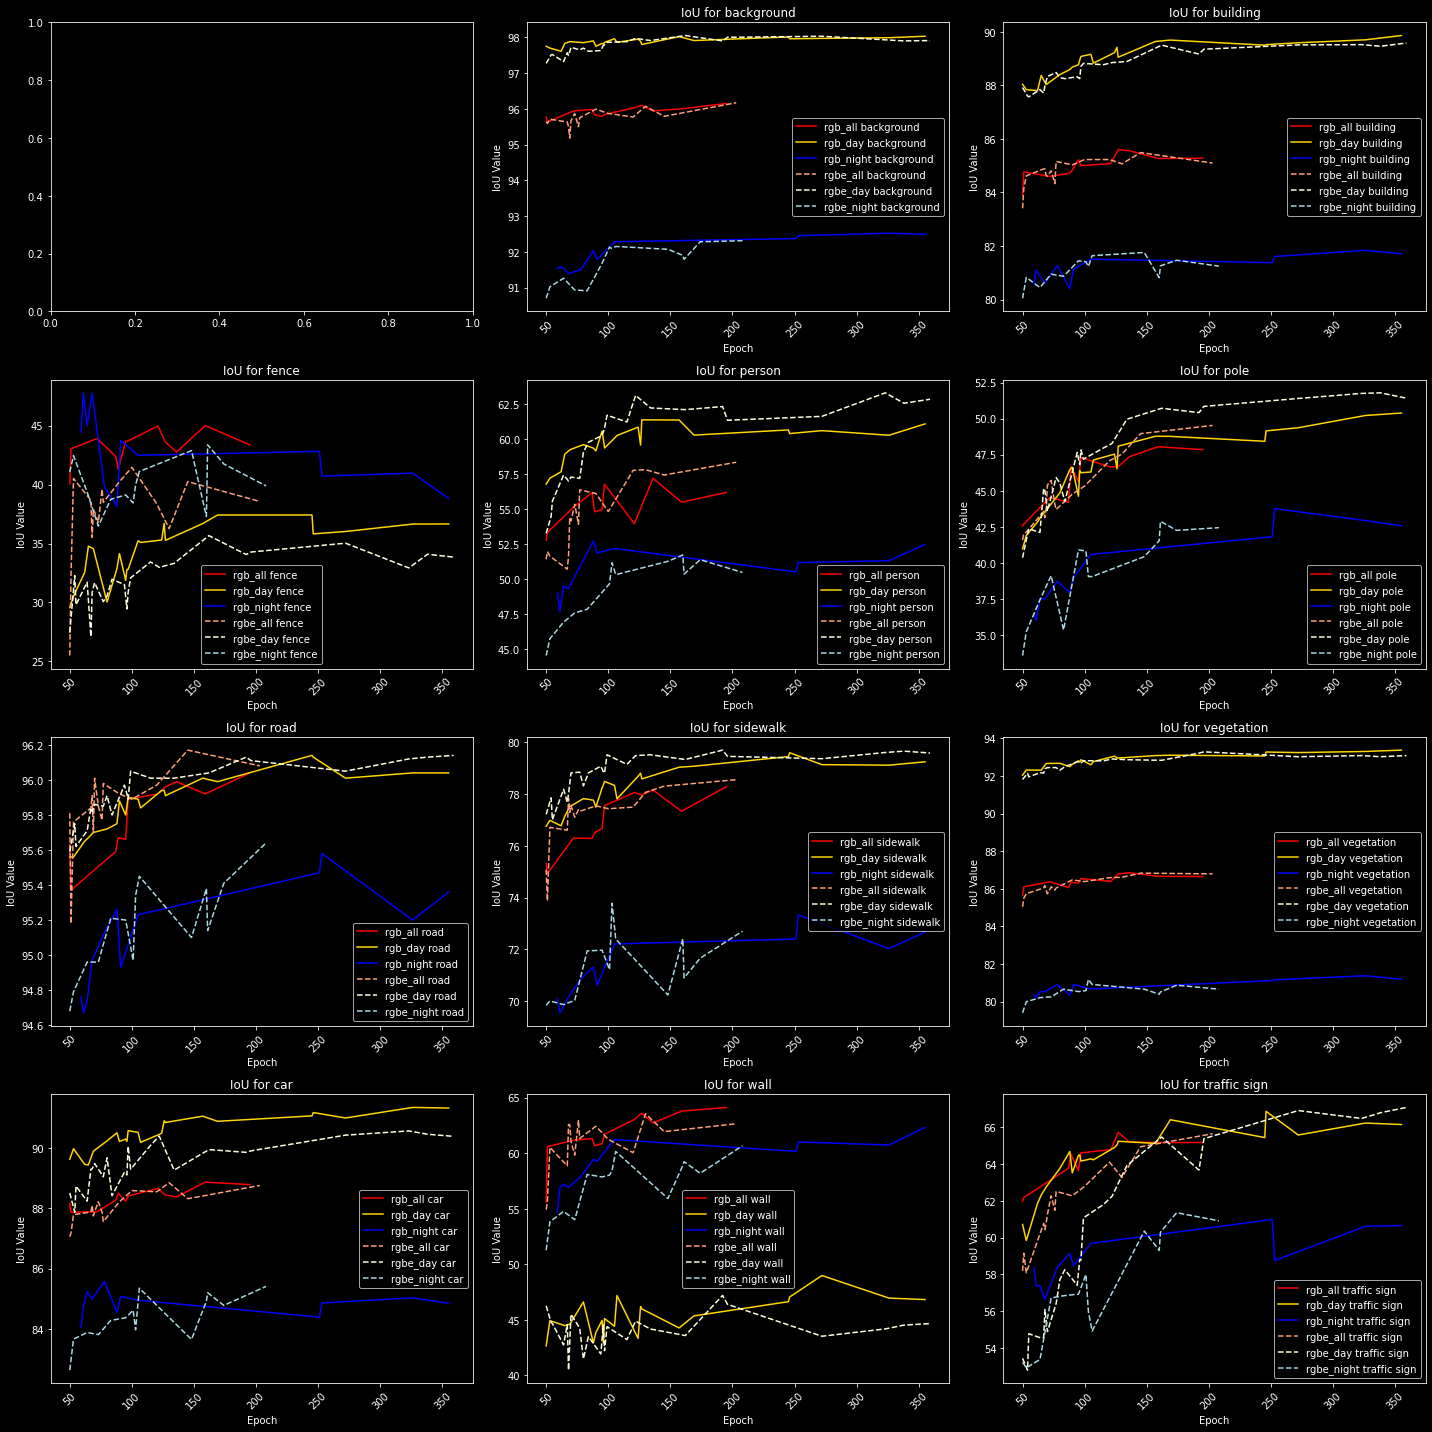

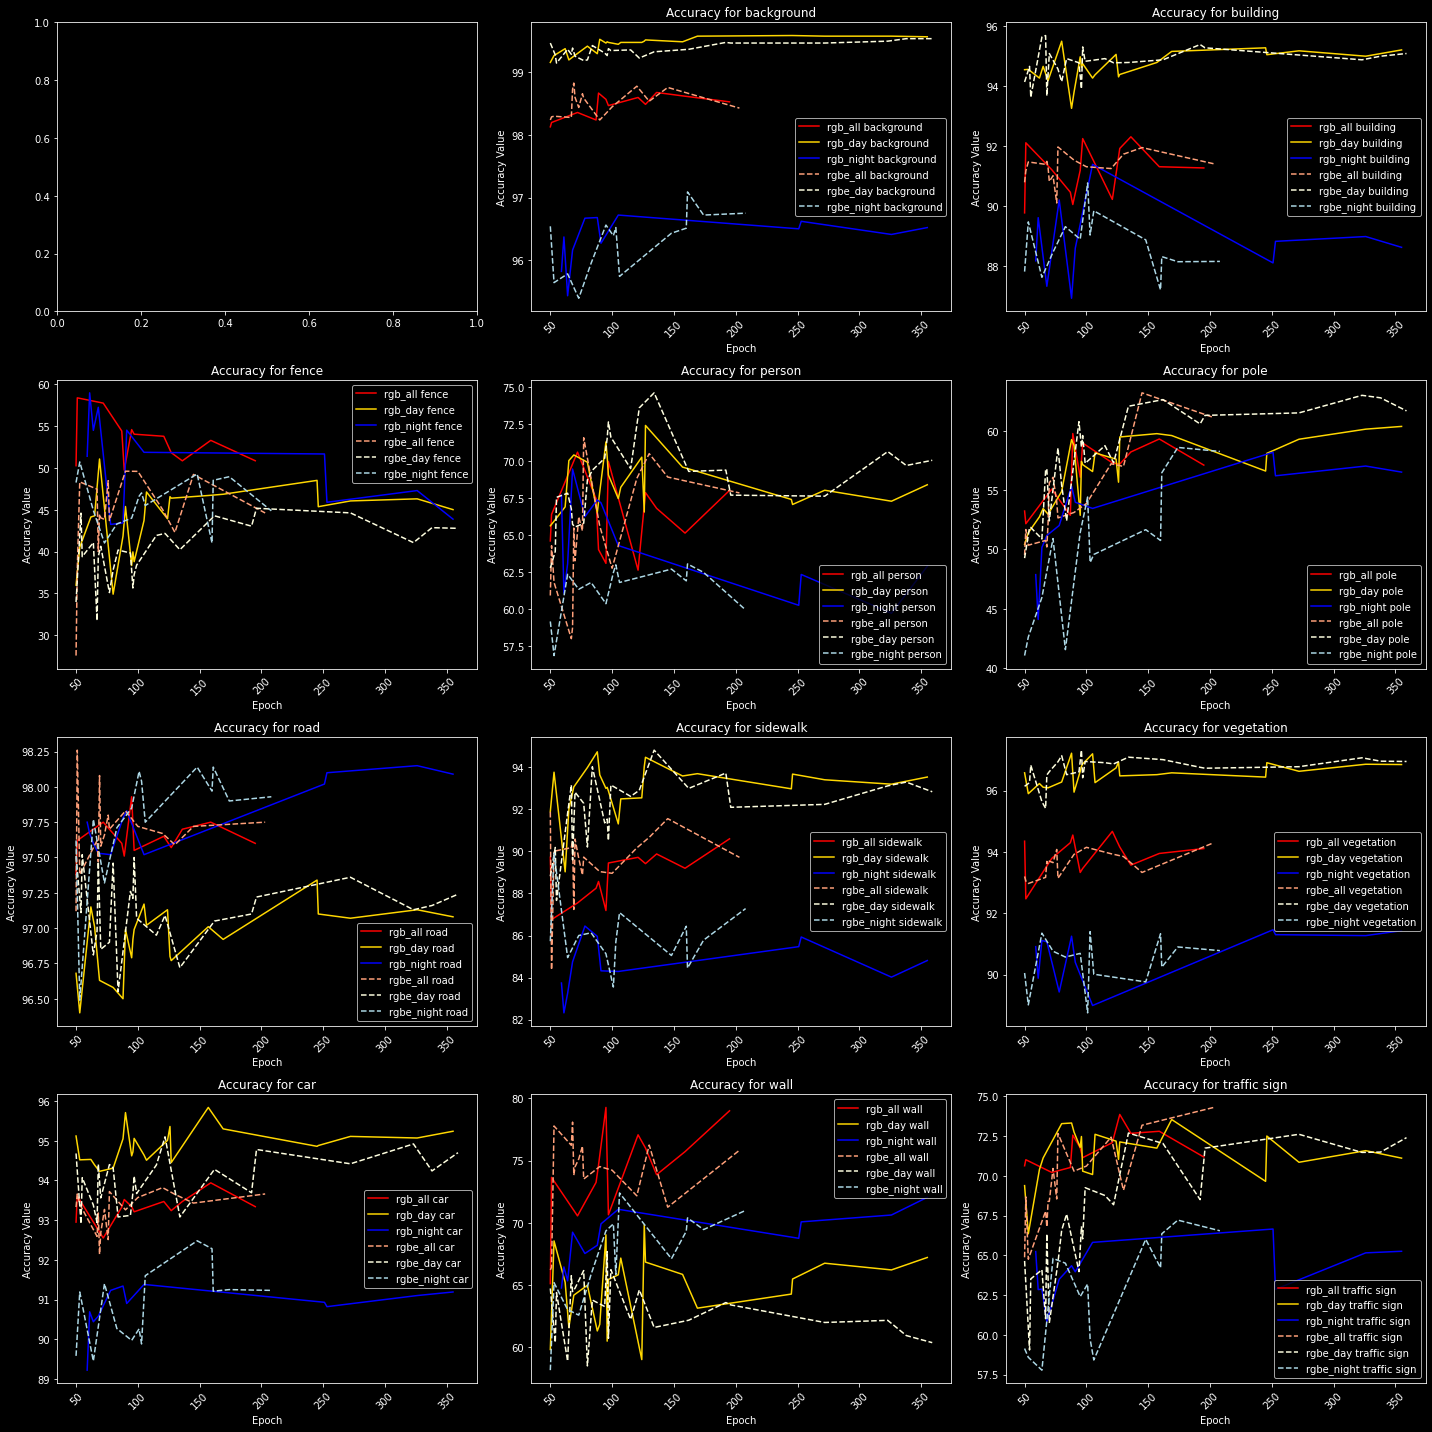

In [55]:

# Determine the number of classes
num_classes = len(all_class_names)
num_cols = 3
num_rows = (num_classes + num_cols - 1) // num_cols

# Plot all IoU training curves in a single figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axs = axs.flatten()

for idx, class_name in enumerate(all_class_names, start=1):
    for scene, results_dict in results_dicts.items():
        class_results = results_dict[class_name]
        # 从 epoch 50 开始提取数据
        filtered_class_results = {epoch: reults for epoch, reults in class_results.items() if epoch >= 50}
        epochs = list(filtered_class_results.keys())
        ious = [filtered_class_results[e]['iou'] for e in epochs]
        line_style, color = line_styles.get(scene, ('-', 'black'))
        axs[idx].plot(epochs, ious, label=f'{scene} {class_name}', linestyle=line_style, color=color)
    axs[idx].set_title(f'IoU for {class_name}')
    axs[idx].set_xlabel('Epoch')
    axs[idx].set_ylabel('IoU Value')
    axs[idx].legend()
    axs[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(idx + 1, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

# Plot all Accuracy training curves in a single figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axs = axs.flatten()

for idx, class_name in enumerate(all_class_names, start=1):
    for scene, results_dict in results_dicts.items():
        class_results = results_dict[class_name]
        # 从 epoch 50 开始提取数据
        filtered_class_results = {epoch: reults for epoch, reults in class_results.items() if epoch >= 50}
        epochs = list(filtered_class_results.keys())
        accs = [filtered_class_results[e]['acc'] for e in epochs]
        line_style, color = line_styles.get(scene, ('-', 'black'))
        axs[idx].plot(epochs, accs, label=f'{scene} {class_name}', linestyle=line_style, color=color)
    axs[idx].set_title(f'Accuracy for {class_name}')
    axs[idx].set_xlabel('Epoch')
    axs[idx].set_ylabel('Accuracy Value')
    axs[idx].legend()
    axs[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(idx + 1, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()